# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import gc 

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


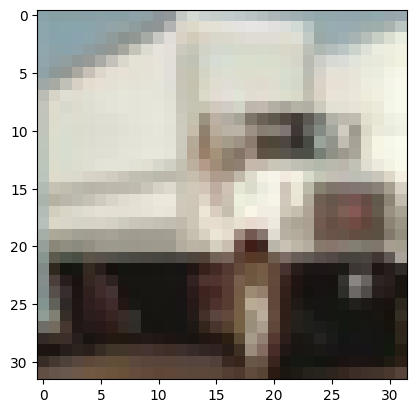

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

<br><br><br>

Build a CNN using Keras Sequential

In [8]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

c:\Users\Nil\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 12s 5ms/step - loss: 1.7138 - accuracy: 0.3764 - val_loss: 1.4306 - val_accuracy: 0.4887
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4329 - accuracy: 0.4833 - val_loss: 1.3458 - val_accuracy: 0.5152
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3375 - accuracy: 0.5230 - val_loss: 1.2321 - val_accuracy: 0.5549
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2790 - accuracy: 0.5457 - val_loss: 1.1523 - val_accuracy: 0.5912
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2286 - accuracy: 0.5628 - val_loss: 1.1544 - val_accuracy: 0.5884
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1948 - accuracy: 0.5767 - val_loss: 1.1102 - val_accuracy: 0.6055
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1718 - accuracy: 0.5867 - val_loss: 1.1346 - val_accurac

In [10]:
score_1 = model_1.evaluate(x_test, y_test)
print("Validation Loss: ", score_1[0])
print("Validation Accuracy: ", score_1[1])
gc.collect()

313/313 [==============================] - 1s 3ms/step - loss: 1.0842 - accuracy: 0.6250
Validation Loss:  1.0841701030731201
Validation Accuracy:  0.625


5802

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [11]:
def plot_loss_accuracy(history, name):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
    plt.suptitle(name)

In [17]:
## Building a model with the pattern above
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), strides=(1,1),padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3), strides=(1,1)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3), strides=(1,1)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                      

| Model_1 Network Summary| Model_2 Network Summary|
| :-: | :-: | 
| 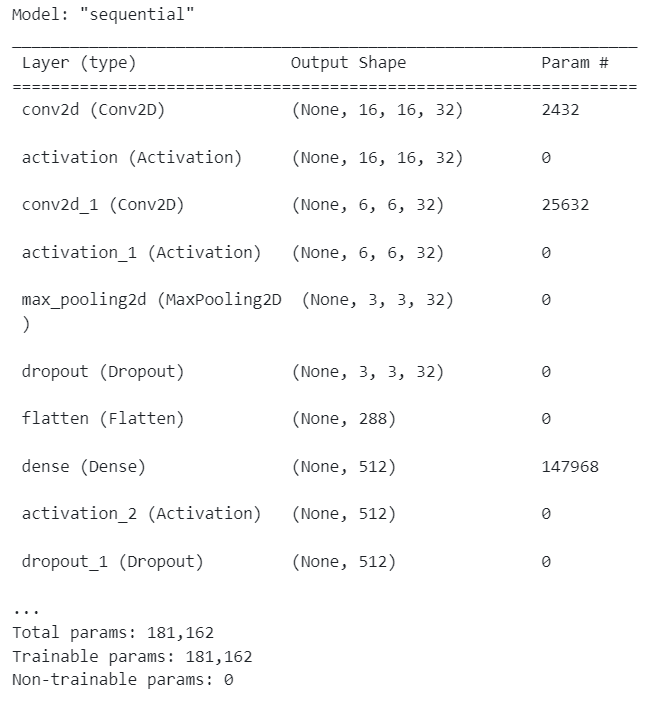 | 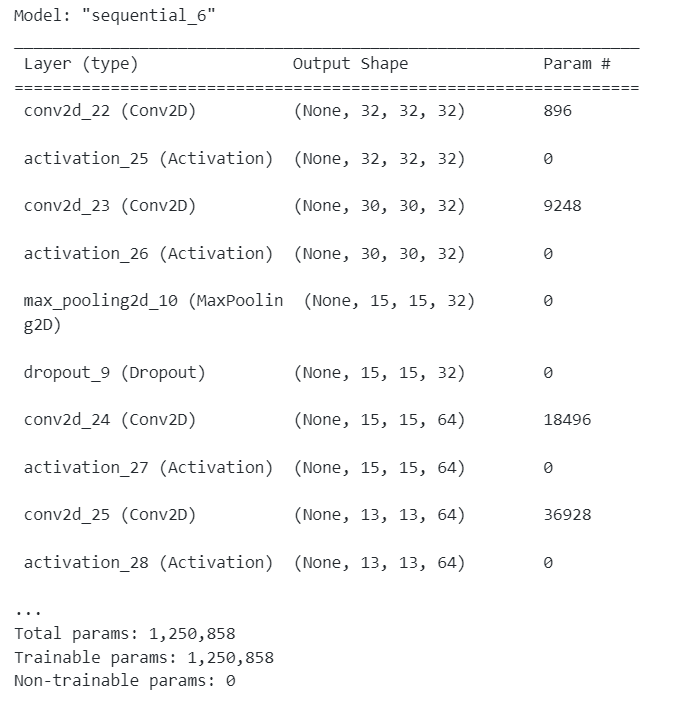 |

- In the `Model_1`, the Total parameters are *181,162*, while `Model_2` has *1,250,858* total parameters; this is because model 2 has a bigger network structure than model 1

<br><br><br>

In [18]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr=0.0005)

model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5448 - accuracy: 0.4426 - val_loss: 1.2822 - val_accuracy: 0.5484
Epoch 2/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1512 - accuracy: 0.5948 - val_loss: 1.0171 - val_accuracy: 0.6437
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9875 - accuracy: 0.6544 - val_loss: 0.9921 - val_accuracy: 0.6604
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8962 - accuracy: 0.6900 - val_loss: 0.8298 - val_accuracy: 0.7118
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8463 - accuracy: 0.7072 - val_loss: 0.8209 - val_accuracy: 0.7126


In [19]:
score_2 = model_2.evaluate(x_test, y_test)
print("Validation Loss: ", score_2[0])
print("Validation Accuracy: ", score_2[1])
gc.collect()

313/313 [==============================] - 1s 3ms/step - loss: 0.8209 - accuracy: 0.7126
Validation Loss:  0.8209123015403748
Validation Accuracy:  0.7125999927520752


3264

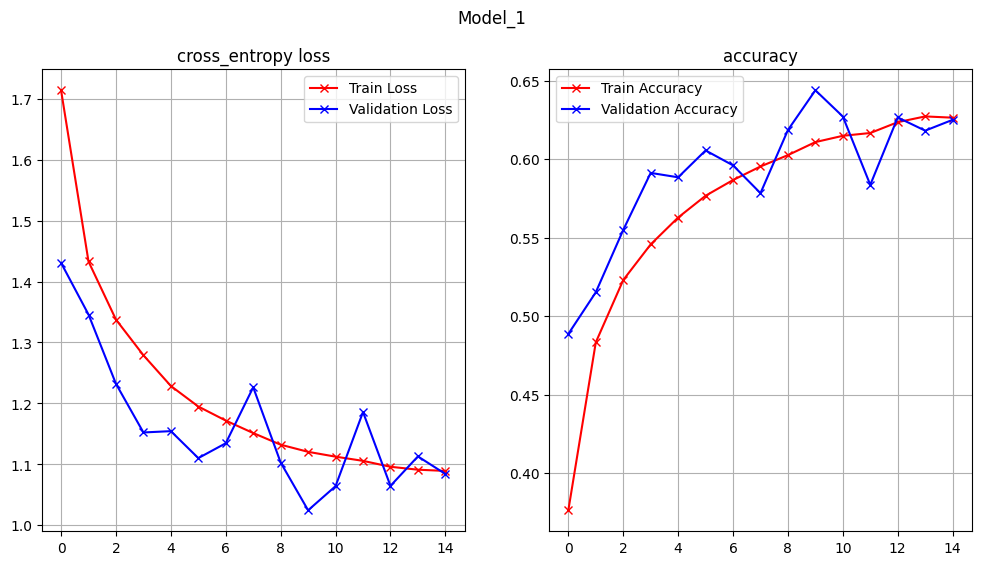

In [20]:
plot_loss_accuracy(history_1, 'Model_1')

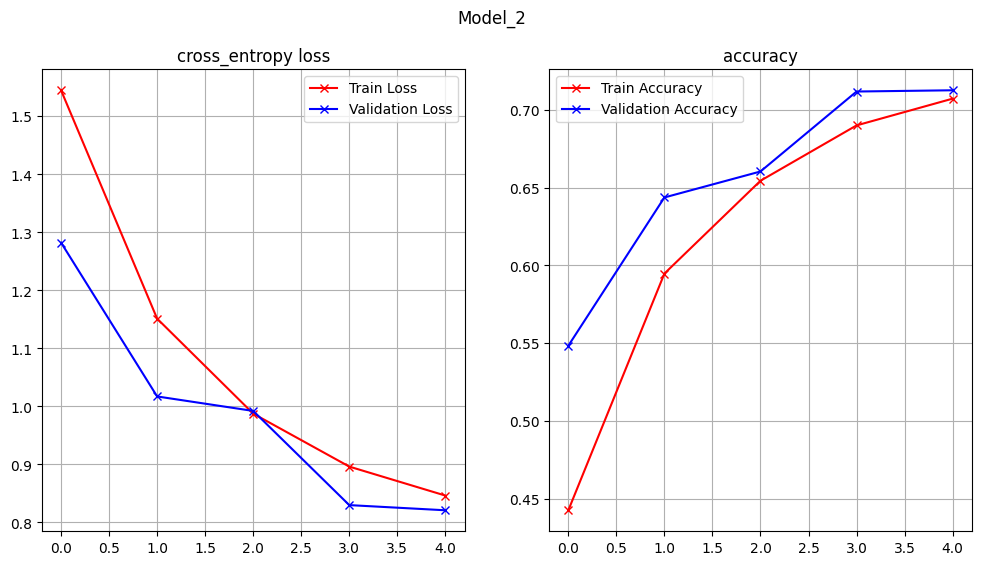

In [21]:
plot_loss_accuracy(history_2, 'Model_2')

| Model_1 | Model_2 |
| :-: | :-: |
| 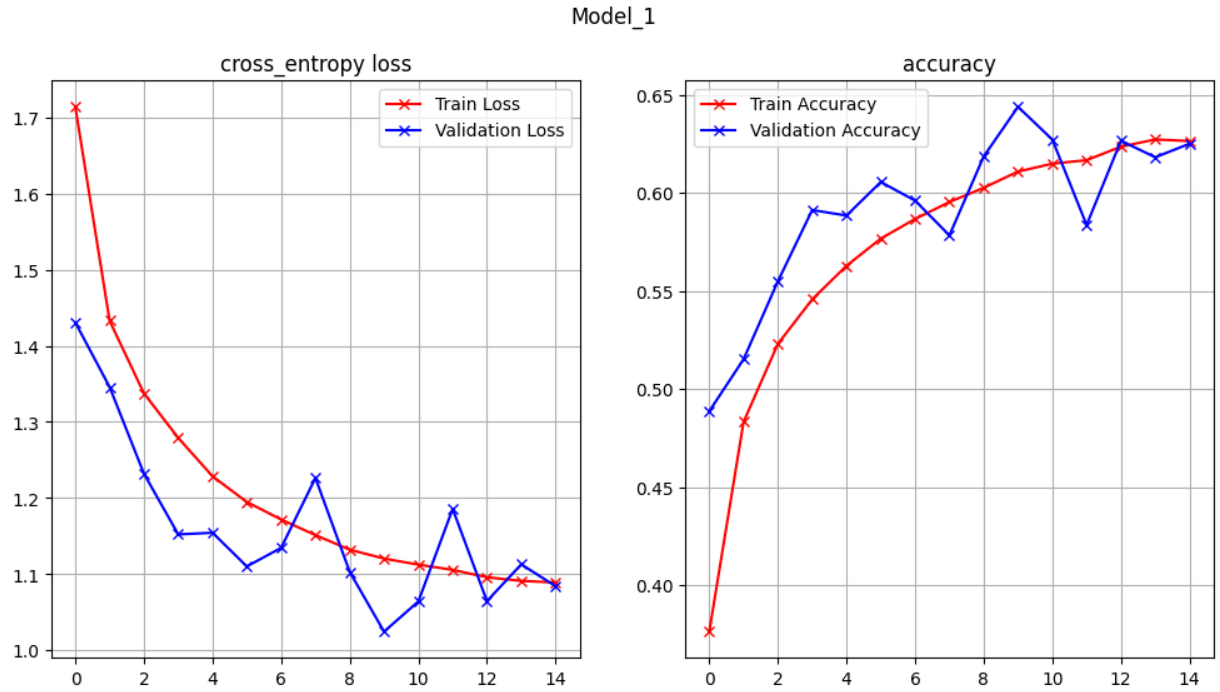 | 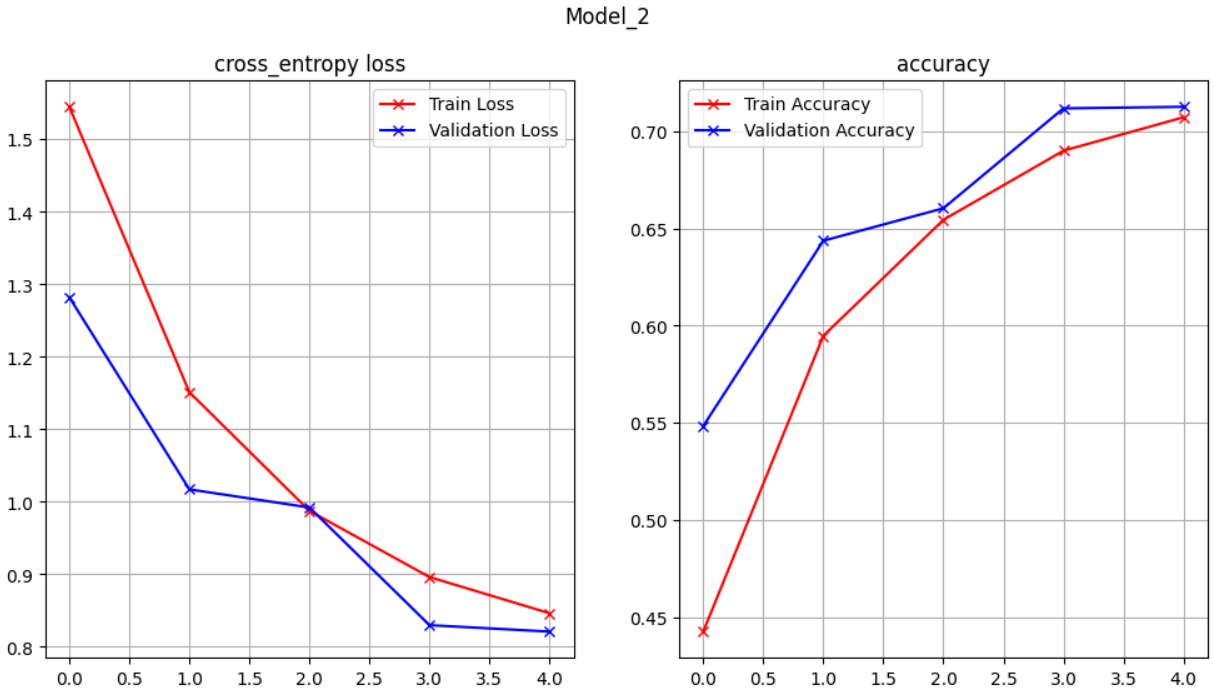 |

-  The `Model_1` and `Model_2`'s validation loss and accuracy are both fluctuating.

<br><br><br>

In [22]:
## Using 5 epochs and a different structure

model_3 = Sequential()

model_3.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(200, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(Conv2D(128, (4, 4), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(50, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())

model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 256)       1179904   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 256)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 200)       461000    
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       409728    
                                                      

In [23]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.00047),
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=32,
              epochs=15,
              verbose=1,
              shuffle=True,
              callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=2)],
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 113s 69ms/step - loss: 1.7710 - accuracy: 0.3347 - val_loss: 1.3916 - val_accuracy: 0.4710
Epoch 2/15
1563/1563 [==============================] - 106s 68ms/step - loss: 1.3172 - accuracy: 0.5170 - val_loss: 1.1321 - val_accuracy: 0.5905
Epoch 3/15
1563/1563 [==============================] - 107s 68ms/step - loss: 1.1018 - accuracy: 0.6050 - val_loss: 1.0381 - val_accuracy: 0.6324
Epoch 4/15
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9628 - accuracy: 0.6588 - val_loss: 0.8736 - val_accuracy: 0.6979
Epoch 5/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.8666 - accuracy: 0.6962 - val_loss: 0.8215 - val_accuracy: 0.7150
Epoch 6/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7925 - accuracy: 0.7259 - val_loss: 0.7378 - val_accuracy: 0.7498
Epoch 7/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7399 - accuracy: 0.7476 - val_loss: 0

In [24]:

score_3 = model_3.evaluate(x_test, y_test, verbose=1)
print("Validation Loss: ", score_3[0])
print("Validation Accuracy: ", score_3[1])
gc.collect()

313/313 [==============================] - 5s 16ms/step - loss: 0.5721 - accuracy: 0.8115
Validation Loss:  0.5721094608306885
Validation Accuracy:  0.8115000128746033


18479

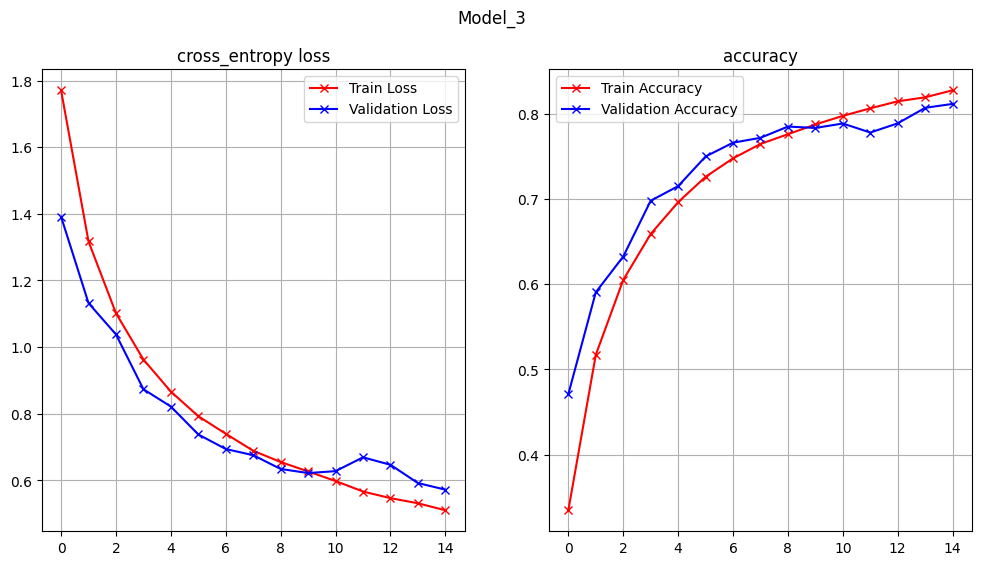

In [25]:
plot_loss_accuracy(history_3, 'Model_3')

#### Conclusion

***During the activity I was able to get the concept of how convulution works***